In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2024-01-13 18:50:48.561236: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-13 18:50:48.643649: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-13 18:50:48.643690: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-13 18:50:48.644841: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-13 18:50:48.655105: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-13 18:50:48.655923: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [28]:
df = pd.read_csv("output_with_M_inv.csv")

In [30]:
df = df.dropna(subset=['M_inv'])

In [39]:
X = df[['E_t', 'px_t', 'py_t', 'pz_t', 'E_t2', 'px_t2', 'py_t2', 'pz_t2', 'E_h', 'px_h', 'py_h', 'pz_h']].loc[:999999]
y = df['M_inv'].loc[:999999]

# X = df[['E_t', 'px_t', 'py_t', 'pz_t', 'E_t2', 'px_t2', 'py_t2', 'pz_t2', 'E_h', 'px_h', 'py_h', 'pz_h']]
# y = df['M_inv']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
df.isnull().sum()

pid_t     0
E_t       0
px_t      0
py_t      0
pz_t      0
pid_t2    0
E_t2      0
px_t2     0
py_t2     0
pz_t2     0
pid_h     0
E_h       0
px_h      0
py_h      0
pz_h      0
M_inv     0
dtype: int64

In [42]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Define the model
from tensorflow.keras.initializers import GlorotUniform

model = Sequential()
model.add(Dense(10, input_dim=12, activation='relu'))
# model.add(Dense(10, input_dim=3, activation='relu', kernel_initializer=GlorotUniform()))
model.add(Dense(1, activation='linear'))


In [44]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers


model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
# optimizer = optimizers.Adam(clipvalue=1.0)
# model.compile(loss='mean_squared_error', optimizer=optimizer)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                130       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
print(X_train_scaled)

[[ 1.35729469 -1.0268352  -0.35004991 ...  0.77572759 -0.5106837
   1.23487651]
 [-0.50899953  0.60794228  0.35382217 ... -0.22687559  0.66062745
  -0.13510454]
 [-0.83619998 -0.31092919 -0.36935131 ...  1.59787644  0.20536133
  -0.15237466]
 ...
 [-0.39381491 -0.3316357   0.23520059 ...  0.17757744  0.92841638
  -1.178083  ]
 [-0.54614789 -0.32097786  0.08365709 ...  0.44489687  0.27207696
   0.23383819]
 [ 2.23824222  0.49054815  1.22724113 ... -0.94377677 -0.84037605
  -0.17860793]]


# Model training

In [58]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[reduce_lr, early_stopping])

Epoch 1/100
11867/11867 [==============================] - 56s 5ms/step - loss: 15148.6953 - val_loss: 15081.9580 - lr: 0.0010
Epoch 2/100
11867/11867 [==============================] - 67s 6ms/step - loss: 15005.2285 - val_loss: 14904.1230 - lr: 0.0010
Epoch 3/100
11867/11867 [==============================] - 65s 5ms/step - loss: 14820.5430 - val_loss: 14708.5752 - lr: 0.0010
Epoch 4/100
11867/11867 [==============================] - 50s 4ms/step - loss: 14596.9238 - val_loss: 14471.0518 - lr: 0.0010
Epoch 5/100
11867/11867 [==============================] - 36s 3ms/step - loss: 14337.0068 - val_loss: 14191.4561 - lr: 0.0010
Epoch 6/100
11867/11867 [==============================] - 46s 4ms/step - loss: 14040.5234 - val_loss: 13894.3330 - lr: 0.0010
Epoch 7/100
11867/11867 [==============================] - 25s 2ms/step - loss: 13722.3193 - val_loss: 13549.4326 - lr: 0.0010
Epoch 8/100
11867/11867 [==============================] - 25s 2ms/step - loss: 13392.3135 - val_loss: 13200.47

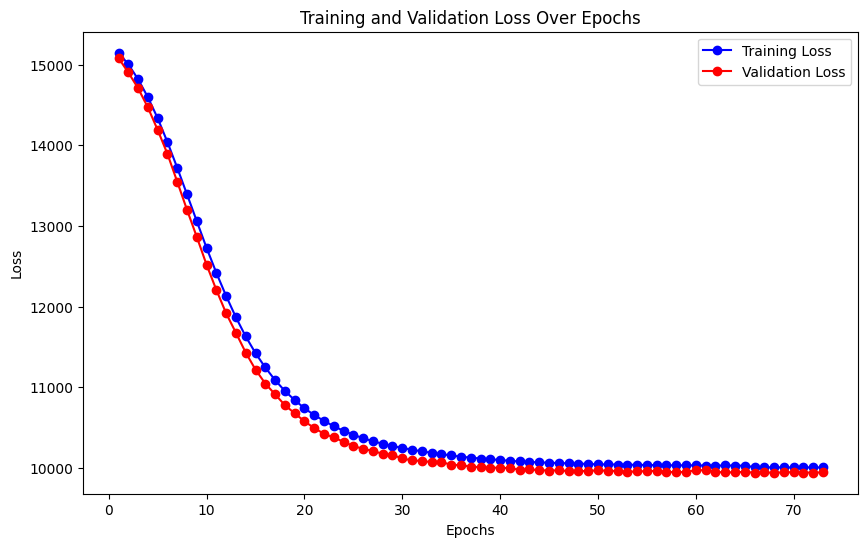

In [59]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))

plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [60]:
mse = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on Test Set: {mse}')

2967/2967 [==============================] - 9s 3ms/step - loss: 9939.7676
Mean Squared Error on Test Set: 9939.767578125


In [61]:
predictions = model.predict(X_test_scaled)

2967/2967 [==============================] - 10s 3ms/step


In [62]:
print(predictions)

[[ 570.62274]
 [1088.127  ]
 [1045.5295 ]
 ...
 [ 565.69464]
 [ 678.69824]
 [ 799.22015]]


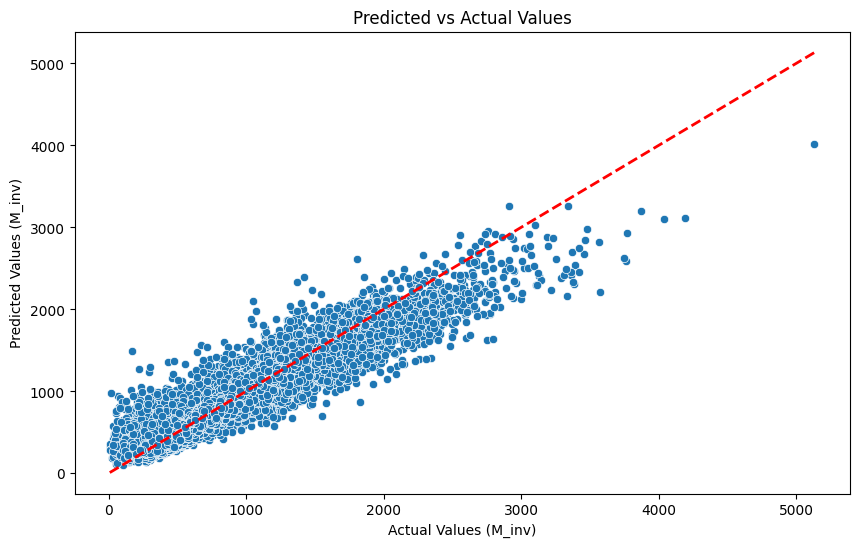

In [63]:

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))

sns.scatterplot(x=y_test, y=predictions.flatten())
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values (M_inv)')
plt.ylabel('Predicted Values (M_inv)')

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

plt.show()

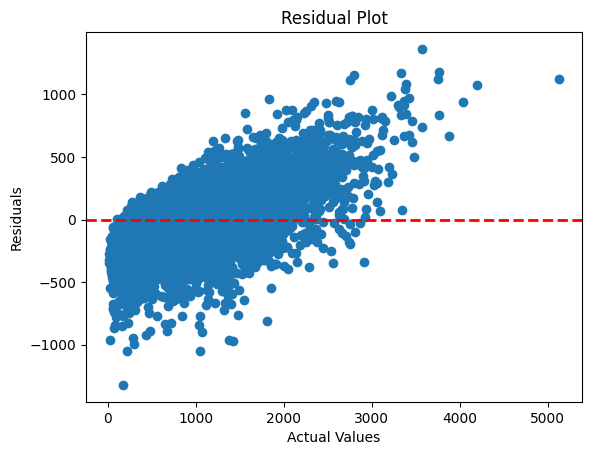

In [66]:
residuals = y_test - predictions.flatten()
plt.scatter(y_test, residuals)
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.show()

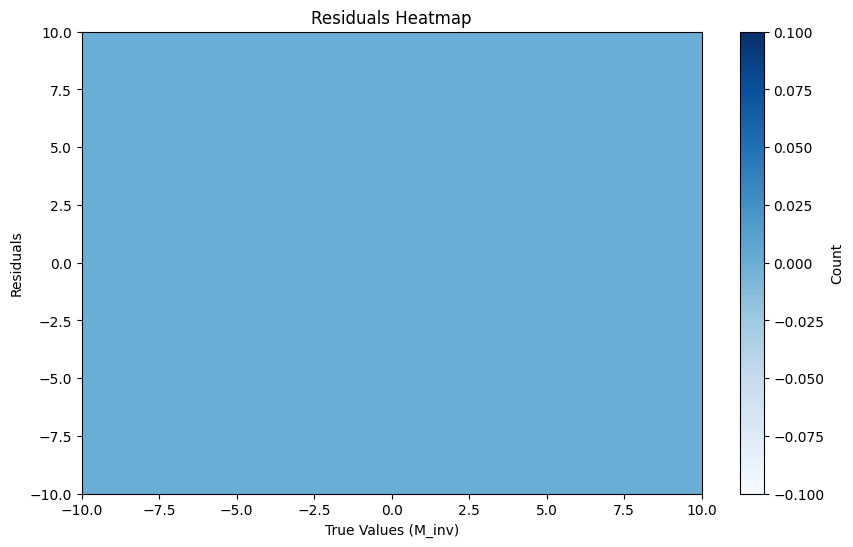

In [65]:
# Assuming 'y_test' is your true values and 'predictions' is your predicted values
residuals = y_test - predictions.flatten()

# Define the bins for the heatmap
bins = np.linspace(-10, 10, 50)  # Adjust the bin range as needed

# Create a 2D histogram (heatmap) of the residuals
plt.figure(figsize=(10, 6))
heatmap = plt.hist2d(y_test, residuals, bins=[bins, bins], cmap='Blues')
plt.colorbar(heatmap[3], label='Count')  # Use heatmap[3] to get the colorbar
plt.title('Residuals Heatmap')
plt.xlabel('True Values (M_inv)')
plt.ylabel('Residuals')
plt.show()